In [42]:
#Import packages
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA


df = pd.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df.head()
df = df.drop(['BeginTimeDate'],axis=1)
df = df.drop(['EndTimeDate'],axis=1)
df[['Facility Class', 'Facility Location', 'Facility', 'Facility Code', 'Status', 'Reservation Type']] = df[['Facility Class', 'Facility Location', 'Facility', 'Facility Code', 'Status', 'Reservation Type']].apply(lambda x: pd.factorize(x)[0])
train_samples = df.values.tolist()

# Perform PCA to reduce to 2 dimensions
norm_train_samples= x = StandardScaler().fit_transform(train_samples)
pca = PCA(n_components=2)
principal_components= pca.fit_transform(norm_train_samples)

# Run k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=0).fit(principal_components)
y_kmeans = kmeans.predict(principal_components)

#Plot k-means
#plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Add legend showing cluster numbers
#plt.legend(handles=plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_kmeans).legend_elements()[0],
           #labels=range(4), title='Cluster')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#plt.ylabel("First Principal Component")
#plt.xlabel("Second Principal Component")
#plt.savefig("clustering.pdf")


In [36]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Combine original data frame with cluster assignments
clustered_df = pd.concat([df, pd.Series(y_kmeans, name='Cluster')], axis=1)

# Perform chi2 feature selection on each cluster
k = 5  # number of top features to select
features = clustered_df.drop(['Cluster'], axis=1).columns
cluster_feature_importance = {}
for c in range(4):
    cluster_df = clustered_df[clustered_df['Cluster'] == c]
    X = cluster_df.drop(['Cluster'], axis=1)
    y = cluster_df['Cluster']
    selector = SelectKBest(f_classif, k=k)
    selector.fit(X, y)
    cluster_feature_importance[c] = [features[i] for i in selector.scores_.argsort()[::-1][:k]]

# Print feature importance for each cluster in LaTeX table format
print('\\begin{tabular}{|c|c|c|c|c|}')
print('\\hline')
print('Cluster & Top Feature 1 & Top Feature 2 & Top Feature 3 & Top Feature 4 & Top Feature 5 \\\\')
print('\\hline')
for c in range(4):
    features = cluster_feature_importance[c]
    print('{} & {} & {} & {} & {} & {} \\\\'.format(c, features[0], features[1], features[2], features[3], features[4]))
print('\\hline')
print('\\end{tabular}')


\begin{tabular}{|c|c|c|c|c|}
\hline
Cluster & Top Feature 1 & Top Feature 2 & Top Feature 3 & Top Feature 4 & Top Feature 5 \\
\hline
0 & BeginTime & Year & Month & Weekday & Duration Minutes \\
1 & BeginTime & Year & Month & Weekday & Duration Minutes \\
2 & BeginTime & Year & Month & Weekday & Duration Minutes \\
3 & BeginTime & Year & Month & Weekday & Duration Minutes \\
\hline
\end{tabular}


/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


In [37]:
import numpy as np
from sklearn.feature_selection import chi2

# Select only the features (not the cluster column)
X = clustered_df.drop(['Cluster'], axis=1)

# Initialize table string
table_str = r"\begin{tabular}{|c|c|c|c|c|} \hline" + "\n"
table_str += r"Cluster & Feature 1 & Feature 2 & Feature 3 & Feature 4 & Feature 5 \\" + "\n"
table_str += r"\hline" + "\n"

# Loop through each cluster
for cluster_num in range(4):
    # Select only the data points in the current cluster
    cluster_X = X.loc[clustered_df['Cluster'] == cluster_num]
    cluster_y = clustered_df.loc[clustered_df['Cluster'] == cluster_num, 'Cluster']

    # Calculate chi2 scores and p-values for each feature
    chi2_scores, p_values = chi2(cluster_X, cluster_y)

    # Get the top 5 features with the lowest p-values
    sorted_indices = np.argsort(p_values)[:5]
    top_5_features = list(cluster_X.columns[sorted_indices])

    # Add the cluster number and top 5 features to the table string
    table_str += f"{cluster_num} & {top_5_features[0]} & {top_5_features[1]} & {top_5_features[2]} & {top_5_features[3]} & {top_5_features[4]} \\\\" + "\n"
    table_str += r"\hline" + "\n"

# Add closing table string
table_str += r"\end{tabular}"
print(table_str)



\begin{tabular}{|c|c|c|c|c|} \hline
Cluster & Feature 1 & Feature 2 & Feature 3 & Feature 4 & Feature 5 \\
\hline
0 & Facility Class & Facility Location & Facility Code & Facility & Status \\
\hline
1 & Facility Class & Facility Location & Facility Code & Facility & Status \\
\hline
2 & Facility Class & Facility Location & Facility Code & Facility & Status \\
\hline
3 & Facility Class & Facility Location & Facility Code & Facility & Status \\
\hline
\end{tabular}


In [38]:
df = pd.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df.head()
df = df.drop(['BeginTimeDate'],axis=1)
df = df.drop(['EndTimeDate'],axis=1)
df['Status_Name']= df['Status']
df['Facility_Location_Name'] = df['Facility Location']
df['Reservation_Type_Name'] = df['Reservation Type']
df['Facility_Class_Name'] = df['Facility Class']
df[['Facility Class', 'Facility Location', 'Facility', 'Facility Code', 'Status', 'Reservation Type']] = df[['Facility Class', 'Facility Location', 'Facility', 'Facility Code', 'Status', 'Reservation Type']].apply(lambda x: pd.factorize(x)[0])
train_samples = df.values.tolist()
df = df.sample(frac=1)
df.head(5)

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,Duration Minutes,Weekday,Month,Year,BeginTime,Status_Name,Facility_Location_Name,Reservation_Type_Name,Facility_Class_Name
7881,4,4,25,24,0,1,36.387374,60.0,0,12,2013,8.833333,Firm,HPC,Activity,BDGYM
67068,1,3,20,19,0,0,50.000000,120.0,4,11,2018,19.000000,Firm,ELC,Facility,BDMUL
59080,4,5,42,42,0,0,50.000000,120.0,5,7,2017,15.000000,Firm,SPL,Facility,BDGYM
82350,4,3,21,20,0,0,50.000000,210.0,3,10,2019,16.000000,Firm,ELC,Facility,BDGYM
92292,13,5,55,55,0,0,26.447088,50.0,5,11,2019,9.000000,Firm,SPL,Facility,BDTRF


In [39]:

# Combine original data frame with cluster assignments
clustered_df = pd.concat([df, pd.Series(y_kmeans, name='Cluster')], axis=1)

# Get count of items with each label in each cluster
counts = clustered_df.groupby(['Cluster', 'Facility_Location_Name']).size().reset_index(name='Count')

# Pivot counts table to get cluster vs. label counts
pivoted_counts = counts.pivot_table(index='Cluster', columns='Facility_Location_Name', values='Count', fill_value=0)

# Print pivoted counts table
print(pivoted_counts.to_latex())



\begin{tabular}{lrrrrrr}
\toprule
Facility\_Location\_Name &  CARN &     CB &  DEPOT &    ELC &    HPC &    SPL \\
Cluster &       &        &        &        &        &        \\
\midrule
0       &   843 &   7247 &     16 &   4234 &   8368 &   4447 \\
1       &  4330 &  14934 &   2712 &  10622 &   7475 &    572 \\
2       &     0 &      0 &      0 &      0 &     23 &  14742 \\
3       &     0 &      8 &      0 &    108 &  12848 &  30120 \\
\bottomrule
\end{tabular}



/var/folders/m9/8zdnmmhn141618g9f6h8tcb80000gn/T/ipykernel_85811/2942563628.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pivoted_counts.to_latex())


In [40]:
# Combine original data frame with cluster assignments
clustered_df = pd.concat([df, pd.Series(y_kmeans, name='Cluster')], axis=1)

# Get count of items with each label in each cluster
counts = clustered_df.groupby(['Cluster', 'Reservation_Type_Name']).size().reset_index(name='Count')

# Pivot counts table to get cluster vs. label counts
pivoted_counts = counts.pivot_table(index='Cluster', columns='Reservation_Type_Name', values='Count', fill_value=0)

# Print pivoted counts table
print(pivoted_counts.to_latex())


\begin{tabular}{lrr}
\toprule
Reservation\_Type\_Name &  Activity &  Facility \\
Cluster &           &           \\
\midrule
0       &     25003 &       152 \\
1       &     21594 &     19051 \\
2       &     13881 &       884 \\
3       &      7178 &     35906 \\
\bottomrule
\end{tabular}



/var/folders/m9/8zdnmmhn141618g9f6h8tcb80000gn/T/ipykernel_85811/659641370.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pivoted_counts.to_latex())


In [28]:
PC1 = principal_components[:,0]
PC2 = principal_components[:,1]

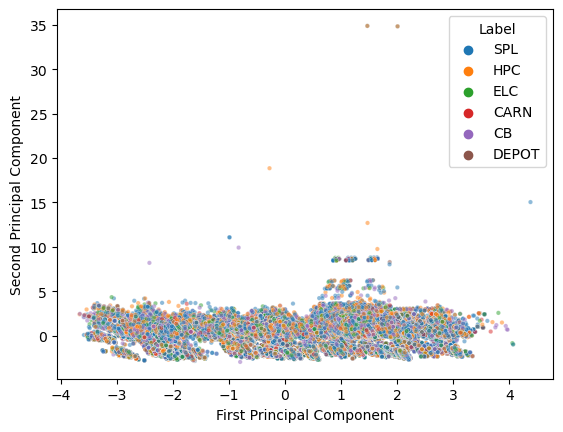

In [29]:
zipped = list(zip(PC1, 
                  PC2, 
                  df['Facility Location'],
                  df.Facility_Location_Name))
 
FACLOCATION_df = pd.DataFrame(zipped, 
                     columns=['PC1', 
                              'PC2', 
                              'Target',
                              'Label'])
 

sns.scatterplot(data=FACLOCATION_df, 
                x="PC1", 
                y="PC2",
                s=10, alpha=0.5,
                hue="Label")
 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('LocationClustering.pdf')

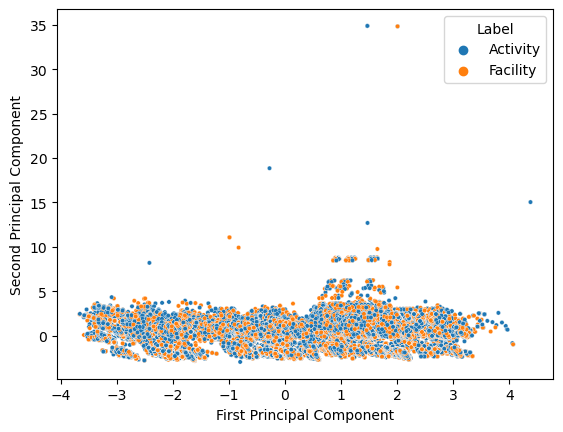

In [30]:
zipped = list(zip(PC1, 
                  PC2, 
                  df['Reservation Type'],
                  df.Reservation_Type_Name))
 
RESTYPE_df = pd.DataFrame(zipped, 
                     columns=['PC1', 
                              'PC2', 
                              'Target',
                              'Label'])
 

sns.scatterplot(data=RESTYPE_df, 
                x="PC1", 
                y="PC2",
                s=10, alpha=1,
                hue="Label")
 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('ReservationClustering.pdf')

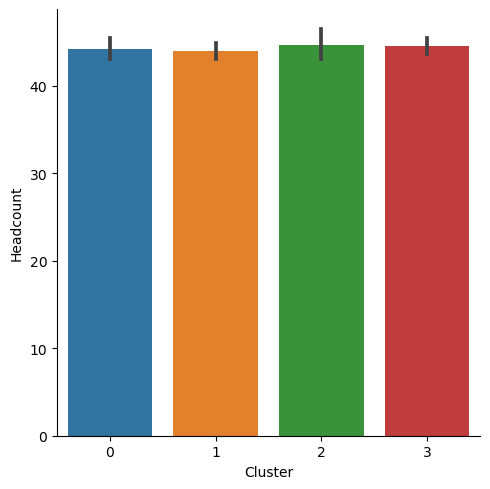

In [41]:

# Create a new DataFrame with headcount and cluster information
headcount_df = df[['Headcount']].copy()
headcount_df['Cluster'] = y_kmeans

# Create the catplot
g = sns.catplot(x='Cluster', y='Headcount', data=headcount_df, kind='bar')
g.set_axis_labels('Cluster', 'Headcount')
plt.show()
g.savefig("ClusterHeadcount.pdf")

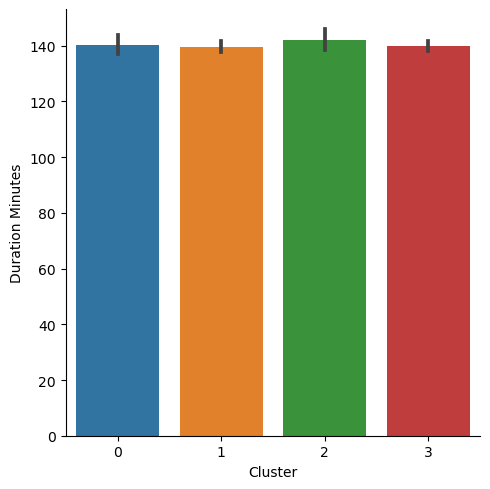

In [33]:

# Create a new DataFrame with duration minutes and cluster information
minutes_df = df[['Duration Minutes']].copy()
minutes_df['Cluster'] = y_kmeans

# Create the catplot
g = sns.catplot(x='Cluster', y='Duration Minutes', data=minutes_df, kind='bar')
g.set_axis_labels('Cluster', 'Duration Minutes')
plt.show()
g.savefig("ClusterDuration.pdf")

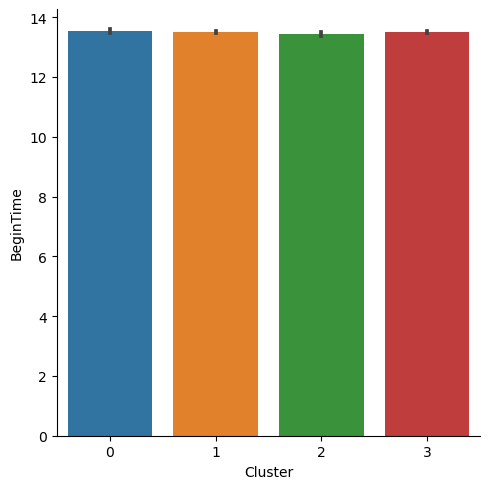

In [34]:
# Create a new DataFrame with beginTime and cluster information
begin_df = df[['BeginTime']].copy()
begin_df['Cluster'] = y_kmeans

# Create the catplot
g = sns.catplot(x='Cluster', y='BeginTime', data=begin_df, kind='bar')
g.set_axis_labels('Cluster', 'BeginTime')
plt.show()
g.savefig("ClusterBeginTime.pdf")